# Laliga Analysis

### Question 1


## Read the dataset using Pandas

Read the dataset with file name 'laliga.csv' (taken from [Wikipedia](https://en.wikipedia.org/wiki/La_Liga)) into a dataframe with name **laliga**. 

(Take care of Headers, see **skiprows** parameter in **read_csv**)


In [53]:
import numpy as np
import pandas as pd

In [299]:
df = pd.read_csv("Laliga.csv")


### Question 2

## Take care of Missing values in the dataset

Missing values are given as '-'. Replace all those missing values with 0.

In [300]:
df.replace('-',0,inplace=True)

### Question 3

## Exploring the Datset attributes

Find all the attributes(columns) in the dataset.

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
Pos              61 non-null int64
Team             61 non-null object
Seasons          61 non-null int64
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null int64
dtypes: int64(3), object(17)
memory usage: 9.6+ KB


### Question 4

## Checking the index of the dataframe and change it with desired attribute.

Change the default index of the laliga dataframe with **'Team'** attribute.

In [180]:
df.index.names = ['Team']
print(df)

      Pos                 Team  Seasons Points GamesPlayed GamesWon  \
Team                                                                  
0       1          Real Madrid       86   4385        2762     1647   
1       2            Barcelona       86   4262        2762     1581   
2       3      Atletico Madrid       80   3442        2614     1241   
3       4             Valencia       82   3386        2664     1187   
4       5      Athletic Bilbao       86   3368        2762     1209   
5       6              Sevilla       73   2819        2408      990   
6       7             Espanyol       82   2792        2626      948   
7       8        Real Sociedad       70   2573        2302      864   
8       9             Zaragoza       58   2109        1986      698   
9      10           Real Betis       51   1884        1728      606   
10     11  Deportivo La Coruna       45   1814        1530      563   
11     12           Celta Vigo       51   1789        1698      586   
12    



## Descriptive Stats

### Question 5

What is the Team that has got maximum championships and whats the maximum count? [consider the **Champions** column]

**Note:** Check the datatype of the column when you are operating on a column, by using **dtype** and change it to required using **astype**

In [301]:
# Team here
Champion = df["Champion"]
Champion = Champion.astype(int)
Champion_index_max = Champion.idxmax()
team = df["Team"][Champion_index_max]
print(team)

Real Madrid


In [302]:
# max count here
count = Champion.max()
print(count)

33


### Question 6

Which Team has come more times under **sixth position** and how many times? (**include** sixth position also)

In [330]:
# Team here
Best_position = df.index[df["BestPosition"]<=6].tolist()
teams = df["Team"][Best_position]
B_position = df["BestPosition"][Best_position]
B_position = B_position.astype('object')
both = pd.DataFrame([teams,B_position])
both.head(20)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,28,29,31,34,37,44,51
Team,Real Madrid,Barcelona,Atletico Madrid,Valencia,Athletic Bilbao,Sevilla,Espanyol,Real Sociedad,Zaragoza,Real Betis,...,Getafe,Hercules,Tenerife,Alaves,Levante,Sabadell,Castellon,Cordoba,Arenas,Real Union
BestPosition,1,1,1,1,1,1,3,1,2,1,...,6,5,5,6,6,4,4,5,3,6


In [332]:
#how many time here
B_position = df["BestPosition"][position1]
print(B_position)


0     1
1     1
2     1
3     1
4     1
5     1
6     3
7     1
8     2
9     1
10    1
11    4
12    4
13    2
14    2
15    4
16    4
17    3
18    3
19    2
20    2
21    6
23    5
24    6
25    5
26    5
28    6
29    6
31    4
34    4
37    5
44    3
51    6
Name: BestPosition, dtype: int64


### Question 7

Lets define **Goal difference** as the difference between the **GoalsFor** and **GoalsAgainst**. And it can take negative values also.

Print all the goal differences for all the teams.

Write a function with name **goal_diff_count** which should return all the teams with their Goal Differences.

Write a function with name **max_goal_diff_team** which should return the team with max Goal Difference.

Write a function with name **min_goal_diff_team** which should return the team with min Goal Difference.



In [351]:
#max_goal_diff_team():
def goal_diff_count(df):
    for_team = df["GoalsFor"].astype(int)
    against_team = df["GoalsAgainst"].astype(int)
    diff = for_team - against_team
    team = df["Team"]
    return diff,team
goal_diff_count(df) 
diff,team = goal_diff_count(df) 
both = pd.DataFrame([team,diff])
print(both)


                    0          1                2         3                4   \
Team       Real Madrid  Barcelona  Atletico Madrid  Valencia  Athletic Bilbao   
Unnamed 0         2807       2786             1225       929              931   

                5         6              7         8           9    ...    \
Team       Sevilla  Espanyol  Real Sociedad  Zaragoza  Real Betis   ...     
Unnamed 0      307      -280             -2      -164        -333   ...     

                   51          52      53      54       55     56      57  \
Team       Real Union  AD Almeria  Europa  Lleida  Leganes  Xerez  Condal   
Unnamed 0         -31         -45     -34    -112      -19    -28     -20   

                        58                59      60  
Team       Atletico Tetuan  Cultural Leonesa  Girona  
Unnamed 0              -34               -31       0  

[2 rows x 61 columns]


In [353]:
#min_goal_diff_team():
diff,team = goal_diff_count(df)
diff.max()

    

2807

In [354]:
#goal_diff_count():
diff,team = goal_diff_count(df)
diff.min()
    

-525

### Question 8

## Adding new attribute to the dataframe

Create a new column in the laliga dataframe with name **WinningPercent** which is percentage of winning. And fill all missing values with 0.

**Percentage of Winning = (GamesWon - GamesPlayed)*100 **


In [368]:
s = (df["GamesWon"].astype(int)-df["GamesPlayed"].astype(int))/(df["GamesPlayed"].astype(int))

s.replace('NaN',0,inplace=True)
Percent_win = s.abs()*100
df['WinningPercent'] = pd.Series(Percent_win,index=df.index)
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Percent_win,WinningPercent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,8,8,3,4,79,1929,1929,1,40.369298,40.369298
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,12,12,4,6,83,1929,1929,1,42.758870,42.758870
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,16,9,7,6,56,1929,2002-03,1,52.524866,52.524866
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,10,11,10,7,50,1931-32,1987-88,1,55.442943,55.442943
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,10,5,8,10,49,1929,1929,1,56.227371,56.227371
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,5,12,6,32,1934-35,2001-02,1,58.887043,58.887043
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,...,4,5,2,5,16,1929,1994-95,3,63.899467,63.899467
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,...,2,5,4,3,19,1929,2010-11,1,62.467420,62.467420
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,...,4,5,4,4,18,1939-40,2012-13,2,64.853978,64.853978
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,...,2,3,4,4,14,1932-33,2015-16,1,64.930556,64.930556


## Slicing a dataframe

### Question 9



Print all the columns from **Seasons** and **GoalsAgainst**.

In [365]:
print(df["Seasons"])
print(df["GoalsAgainst"])


0     86
1     86
2     80
3     82
4     86
5     73
6     82
7     70
8     58
9     51
10    45
11    51
12    42
13    44
14    43
15    37
16    36
17    38
18    27
19    33
20    17
21    23
22    17
23    21
24    12
25    20
26    13
27    18
28    12
29    11
      ..
31    14
32    12
33     9
34    11
35     7
36     6
37     9
38     4
39     5
40     6
41     6
42     4
43     3
44     7
45     3
46     4
47     2
48     2
49     4
50     3
51     4
52     2
53     3
54     2
55     1
56     1
57     1
58     1
59     1
60     1
Name: Seasons, dtype: int64
0     3140
1     3114
2     3309
3     3469
4     3700
5     3373
6     3889
7     3230
8     2847
9     2492
10    2188
11    2624
12    2180
13    2368
14    2152
15    1834
16    1763
17    1951
18    1371
19    1746
20     789
21    1157
22    1088
23    1022
24     633
25    1050
26     744
27     992
28     623
29     632
      ... 
31     720
32     662
33     489
34     588
35     410
36     366
37     430
38   

### Question 10

Print all the teams which have started playing between **1930-1980**.

**Steps:**

Split the start year first.

Check the data type and change it to **int** if its not. 

Then do the operation on that.

In [288]:
year =(df["Debut"])
year = year.str.split('-').str.get(0).astype(int)
start =(year > 1930) & (year < 1980)
ind =  start.nonzero()
ind = list(ind)
ind[0][1]
d = df['Team']
d.iloc[(ind[0])]







Team
3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object

### Question 11

Print the rows with Team name **'Real Madrid'**, **Getafe** and **'Valencia'**.

In [146]:
print(df.iloc[[0,24,3]])


    Pos         Team  Seasons Points GamesPlayed GamesWon GamesDrawn  \
0     1  Real Madrid       86   4385        2762     1647        552   
24   25       Getafe       12    553         456      147        112   
3     4     Valencia       82   3386        2664     1187        616   

   GamesLost GoalsFor GoalsAgainst Champion Runner-up Third Fourth Fifth  \
0        563     5947         3140       33        23     8      8     3   
24       197      520          633        0         0     0      0     0   
3        861     4398         3469        6         6    10     11    10   

   Sixth   T    Debut Since/LastApp  BestPosition  
0      4  79     1929          1929             1  
24     1   1  2004-05       2015-16             6  
3      7  50  1931-32       1987-88             1  


### Question 12

Print the columns with columns **'Points'**, **'GamesWon'** and **'WinningPercent'**.

In [369]:
print(df[["Points","GamesWon","WinningPercent"]])



   Points GamesWon  WinningPercent
0    4385     1647       40.369298
1    4262     1581       42.758870
2    3442     1241       52.524866
3    3386     1187       55.442943
4    3368     1209       56.227371
5    2819      990       58.887043
6    2792      948       63.899467
7    2573      864       62.467420
8    2109      698       64.853978
9    1884      606       64.930556
10   1814      563       63.202614
11   1789      586       65.488810
12   1471      463       68.417462
13   1416      453       68.277311
14   1389      471       67.695473
15   1351      426       67.678300
16   1314      390       68.924303
17   1174      408       65.771812
18   1148      333       66.295547
19   1020      367       66.514599
20    970      266       58.823529
21    667      218       70.619946
22    662      189       71.012270
23    606      203       70.058997
24    553      147       67.763158
25    538      184       70.700637
26    510      155       68.623482
27    445      145  

### Question 13

**Double** the **Points** for all the **Teams** and save it in the dataframe as well.

In [373]:
df["Points"] = df["Points"] *2
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Percent_win,WinningPercent
0,1,Real Madrid,86,43854385438543854385438543854385,2762,1647,552,563,5947,3140,...,8,8,3,4,79,1929,1929,1,40.369298,40.369298
1,2,Barcelona,86,42624262426242624262426242624262,2762,1581,573,608,5900,3114,...,12,12,4,6,83,1929,1929,1,42.758870,42.758870
2,3,Atletico Madrid,80,34423442344234423442344234423442,2614,1241,598,775,4534,3309,...,16,9,7,6,56,1929,2002-03,1,52.524866,52.524866
3,4,Valencia,82,33863386338633863386338633863386,2664,1187,616,861,4398,3469,...,10,11,10,7,50,1931-32,1987-88,1,55.442943,55.442943
4,5,Athletic Bilbao,86,33683368336833683368336833683368,2762,1209,633,920,4631,3700,...,10,5,8,10,49,1929,1929,1,56.227371,56.227371
5,6,Sevilla,73,28192819281928192819281928192819,2408,990,531,887,3680,3373,...,4,5,12,6,32,1934-35,2001-02,1,58.887043,58.887043
6,7,Espanyol,82,27922792279227922792279227922792,2626,948,608,1070,3609,3889,...,4,5,2,5,16,1929,1994-95,3,63.899467,63.899467
7,8,Real Sociedad,70,25732573257325732573257325732573,2302,864,577,861,3228,3230,...,2,5,4,3,19,1929,2010-11,1,62.467420,62.467420
8,9,Zaragoza,58,21092109210921092109210921092109,1986,698,522,766,2683,2847,...,4,5,4,4,18,1939-40,2012-13,2,64.853978,64.853978
9,10,Real Betis,51,18841884188418841884188418841884,1728,606,440,682,2159,2492,...,2,3,4,4,14,1932-33,2015-16,1,64.930556,64.930556


# Analysis of Donald Trump's Tweets 

### Question 1

## Read the dataset into a dataframe

Read the dataset **'trump_twitter.csv'** (taken from [FiveThirtyEight](https://data.fivethirtyeight.com/)) into a dataframe with name **trump_df** using pandas.

In [126]:
import pandas as pd
import numpy as np

In [290]:
df = pd.read_csv("trump_twitter.csv")


### Question 2

## Trump is really excited for running as President. 

Find the percentage of tweets with **atleast one '!'**.

In [291]:
#tweet = df["text"]
#print(tweet)
excited_tweet_len = len(df[df['text'].str.contains('!')])
total_tweet = len(df["text"])
print(excited_tweet_len)
print(total_tweet)
percent_excited = (excited_tweet_len/total_tweet)*100
print(percent_excited)


233
448
52.00892857142857


### Question 3

## Number of Tweets Donald Trump posted per day

Plot the number of tweets per day trump posted.

Refer, if you are looking for Date splitting : http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html


In [298]:
def get_element(my_list,position):
    return  my_list[position]
date = df['created_at']
createdate = date.replace('/','-').str.split(' ').apply(get_element,position=0)
df['created_at']=createdate

                

In [293]:
print(df)

               id created_at  \
0    7.656299e+17  8/16/2016   
1    7.587319e+17  7/28/2016   
2    7.583505e+17  7/27/2016   
3    7.575775e+17  7/25/2016   
4    7.536034e+17  7/14/2016   
5    7.535803e+17  7/14/2016   
6    7.533533e+17  7/13/2016   
7    7.526186e+17  7/11/2016   
8    7.518893e+17   7/9/2016   
9    7.481639e+17  6/29/2016   
10   7.472062e+17  6/26/2016   
11   7.471901e+17  6/26/2016   
12   7.471024e+17  6/26/2016   
13   7.375967e+17  5/31/2016   
14   7.360163e+17  5/27/2016   
15   7.344056e+17  5/22/2016   
16   7.320336e+17  5/16/2016   
17   7.315018e+17  5/14/2016   
18   7.297717e+17   5/9/2016   
19   7.240523e+17  4/24/2016   
20   7.220174e+17  4/18/2016   
21   7.214589e+17  4/16/2016   
22   7.214506e+17  4/16/2016   
23   7.198307e+17  4/12/2016   
24   7.189933e+17  4/10/2016   
25   7.148258e+17  3/29/2016   
26   7.138208e+17  3/26/2016   
27   7.110843e+17  3/19/2016   
28   7.109957e+17  3/19/2016   
29   7.098932e+17  3/16/2016   
..      

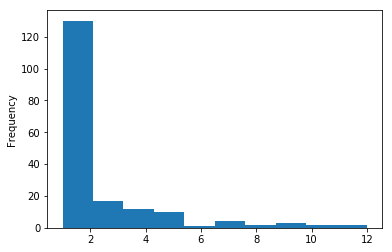

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
groups = df.groupby(['created_at']).size()
groups.plot.hist()
plt.show()